In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import Image

# read dataset
URL='https://raw.githubusercontent.com/tanisha03/DM-PartC/master/Code/data.csv?token=AI5VVFJNMZDSCWDVVHDKBWDAB2L3K'
poke = pd.read_csv(URL)
poke.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


## Dataset Features
* **Number.** Pokémon ID in the Pokédex.
* **Name.** Name of the Pokémon.
* **Type_1.** Primary type.
* **Type_2.** Second type, in case the Pokémon has it.
* **Total.** Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).
* **HP.** Base Health Points.
* **Attack.** Base Attack.
* **Defense.** Base Defense.
* **Sp_Atk.** Base Special Attack.
* **Sp_Def.** Base Special Defense.
* **Speed.** Base Speed.
* **Generation.** Number of the generation when the Pokémon was introduced.
* **isLegendary.** Boolean that indicates whether the Pokémon is Legendary or not.
* **Color.** Color of the Pokémon according to the Pokédex.
* **hasGender.** Boolean that indicates if the Pokémon can be classified as female or male.
* **Pr_male.** In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.
* **Egg_Group_1.** Egg Group of the Pokémon.
* **Egg_Group_2.** Second Egg Group of the Pokémon, in case it has two.
* **hasMegaEvolution.** Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
* **Height_m.** Height of the Pokémon, in meters.
* **Weight_kg.** Weight of the Pokémon, in kilograms.
* **Catch_Rate.** Catch Rate.
* **Body_Style.** Body Style of the Pokémon according to the Pokédex.

In [ ]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [ ]:
poke.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [ ]:
poke = poke.drop('Number', axis=1)

## Missing Data

In [ ]:
# verify the missing data and quantify
missing = pd.DataFrame({'qtd_NaN_data':poke.isna().sum(), 
                        'perc_NaN_data':round((poke.isna().sum()*100/poke.shape[0]), 2)})
missing

,qtd_NaN_data,perc_NaN_data
Number,0,0.00
Name,0,0.00
Type_1,0,0.00
Type_2,371,51.46
Total,0,0.00
HP,0,0.00
Attack,0,0.00
Defense,0,0.00
Sp_Atk,0,0.00
Sp_Def,0,0.00


Missing data
* 371 has no second type
* 77 has no Pr_Male
* 530 has no Egg_Group_2

In [ ]:
# Data when 'Pr_Male' is NaN
poke[poke['Pr_Male'].isna()].head(5)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
80,81,Magnemite,Electric,Steel,325,25,35,70,95,55,45,1,False,Grey,False,NaN,Mineral,NaN,False,0.30,6.0,190,head_arms
81,82,Magneton,Electric,Steel,465,50,60,95,120,70,70,1,False,Grey,False,NaN,Mineral,NaN,False,0.99,60.0,60,multiple_bodies
99,100,Voltorb,Electric,NaN,330,40,30,50,55,55,100,1,False,Red,False,NaN,Mineral,NaN,False,0.51,10.4,190,head_only
100,101,Electrode,Electric,NaN,480,60,50,70,80,80,140,1,False,Red,False,NaN,Mineral,NaN,False,1.19,66.6,60,head_only
119,120,Staryu,Water,NaN,340,30,45,55,70,55,85,1,False,Brown,False,NaN,Water_3,NaN,False,0.79,34.5,225,head_base


In [ ]:
# verify if all data with NaN in Pr_Male has field hasGender equals False
print('Without Pr Male:{} - Has gender False:{}'.format(
    poke['Number'][poke['Pr_Male'].isna()].count(),
    poke['Number'][poke['hasGender'] == False].count()))

# compare quantities of isLegendary pokemons with isLegendary and hasGender equals False
print('Is Legendary :{} - Has gender False:{}'.format(
    poke['Number'][poke['isLegendary'] == True].count(),
    poke['Number'][(poke['hasGender'] == False) & (poke['isLegendary'] == True)].count()))

Without Pr Male:77 - Has gender False:77
Is Legendary :46 - Has gender False:40


In [ ]:
# list of legendery with gender
print('**   Legendary pokemons with gender  **')
print()
poke[(poke['hasGender'] == True) & (poke['isLegendary'] == True)]

**   Legendary pokemons with gender  **



,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
379,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True,Red,True,0.0,Undiscovered,NaN,True,1.40,40.0,3,two_wings
380,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True,Blue,True,1.0,Undiscovered,NaN,True,2.01,60.0,3,two_wings
484,485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True,Brown,True,0.5,Undiscovered,NaN,False,1.70,430.0,3,quadruped
640,641,Tornadus,Flying,NaN,580,79,115,70,125,80,111,5,True,Green,True,1.0,Undiscovered,NaN,False,1.50,63.0,3,head_arms
641,642,Thundurus,Electric,Flying,580,79,115,70,125,80,111,5,True,Blue,True,1.0,Undiscovered,NaN,False,1.50,61.0,3,head_arms
644,645,Landorus,Ground,Flying,600,89,125,90,115,80,101,5,True,Brown,True,1.0,Undiscovered,NaN,False,1.50,68.0,3,head_arms


**Type_1** and **Egg_Group_2** has a lot of NaN data because many pokemons are only one type and one egg group.

10 percent are **Pr_Male** NaN because 77 pokemons has no gender and if these, 40 are Legendary of 46 Legendaries.

In [ ]:
threshold = sum(poke.Speed)/len(poke.Speed)
print('threshold = ',threshold)
poke["speed_level"] = ["high" if i > threshold else "low" for i in poke.Speed]
poke.loc[:10,["speed_level","Speed"]]

threshold =  65.71428571428571


,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,low,65
4,high,80
5,high,100
6,low,43
7,low,58
8,high,78
9,low,45


# **Unvariate Analysis**

To gain an insight of the distributions of the different variables as well as some relationships between them.

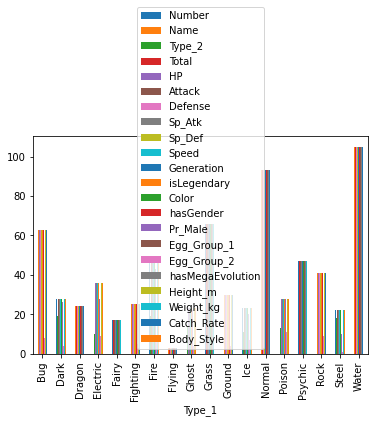

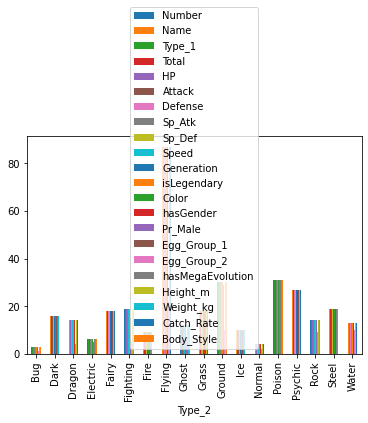

In [ ]:
poke.groupby('Type_1').count().plot(kind='bar')
poke.groupby('Type_2').count().plot(kind='bar')

The most common primary types are Water, Normal, and Grass, while the most common sec-
ondary type is Flying, because most of the times a Pokémon is able to fly the other type is considered first. We
can also see that more or less the half of the Pokémon do not have any secondary type.


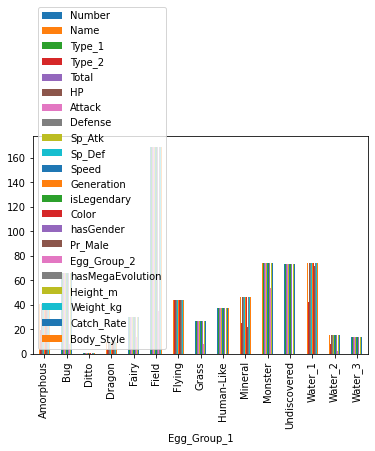

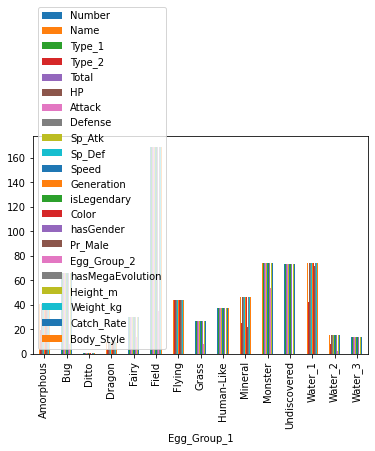

In [ ]:
poke.groupby('Egg_Group_1').count().plot(kind='bar')
poke.groupby('Egg_Group_1').count().plot(kind='bar')

# **Relations and Dependencies between variables**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

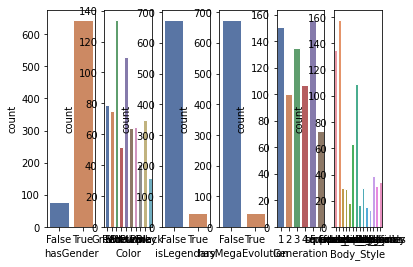

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax =plt.subplots(1,6)
sns.set(rc={'figure.figsize':(10,40)})
sns.countplot(data['hasGender'], ax=ax[0])
sns.countplot(data['Color'], ax=ax[1])
sns.countplot(data['isLegendary'], ax=ax[2])
sns.countplot(data['hasMegaEvolution'], ax=ax[3])
sns.countplot(data['Generation'], ax=ax[4])
sns.countplot(data['Body_Style'], ax=ax[5])
fig.show()

## Categorical features analysis



In [ ]:
# list of categorical features
cat_feat = ['Type_1', 'Type_2', 'Color', 'isLegendary', 
              'hasGender', 'Egg_Group_1', 'Egg_Group_2', 
              'hasMegaEvolution', 'Body_Style']

# instantiate a subplot fig
fig = make_subplots(rows=5,cols=2,
                    vertical_spacing=0.09,
                    horizontal_spacing=0.075,
                    subplot_titles=cat_feat)

# add each trace generated by each feature
for enu, c in enumerate(cat_feat):
    # total values
    status_values = poke[c].value_counts().to_frame()
    # plot distribuition
    trace = go.Bar(x=status_values.index, 
                   y=status_values[c], 
                   text=status_values[c], 
                   textposition='auto',
                   name=c
                  )
    
    # calculate position
    row=int(np.ceil((enu+1)/2))
    col=(enu % 2)+1
    
    # add trace
    fig.append_trace(trace, row=row, col=col)
    fig.update_xaxes(tickangle = 45)
    fig.update_yaxes(showgrid = False,showticklabels = False)

# update layout
fig.update_layout(title_text='Distribuition of Categorical Data', 
                  height=1200, width=1100)

# to be viewed on github
#img = fig.to_image(format='jpg')
#Image(img)
# to normal plot
fig.show()

## Numerical features distribution



In [ ]:
# list of numerical features
num_feat = ['Total','HP','Attack','Defense','Sp_Atk','Sp_Def',
'Speed','Generation','Pr_Male','Height_m','Weight_kg','Catch_Rate']

# create a subplot
sub_fig = make_subplots(rows=int(np.ceil((len(num_feat))/3)),
                        cols=3, 
                        vertical_spacing=0.09,
                        horizontal_spacing=0.075,
                        subplot_titles=num_feat)
sub_fig.update_layout(title='Distribuition of Numerical Data', height=800, width=800)

# for each feature
for enu, i in enumerate(num_feat):
    
    # calculate position
    row=int(np.ceil((enu+1)/3))
    col=(enu % 3)+1
    
    # just a custom bin size
    if i == 'Pr_Male' or i == 'Height_m' or i == 'Generation':
        fig = ff.create_distplot(hist_data=[poke[i].dropna()], 
                                 group_labels=[i],
                                 bin_size=[.2], colors=[enu])
    else:
        fig = ff.create_distplot(hist_data=[poke[i].dropna()], 
                                 group_labels=[i],
                                 bin_size=[10], colors=[enu])
    # add each data at subplot
    for mydata in fig['data']:
        sub_fig.append_trace(mydata, row, col)
        


# to be viewed on github
#img_bytes = sub_fig.to_image(format="jpeg")
#Image(img_bytes)

# to normal plot
sub_fig.show()

## Correlations Analysis


In [ ]:
poke.corr()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Number,1.000000,0.160370,0.107512,0.138104,0.121401,0.120161,0.111822,0.028156,0.983329,0.135022,-0.100328,-0.013414,-0.117981,-0.009710,0.087309,-0.074931
Total,0.160370,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.481837,-0.385978,0.113564,0.228503,0.526813,0.535966,-0.738280
HP,0.107512,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,0.258926,-0.155031,-0.066704,0.093708,0.442872,0.431320,-0.478725
Attack,0.138104,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.302786,-0.196892,0.213882,0.203840,0.408590,0.469395,-0.525106
Defense,0.121401,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.274446,-0.269466,0.063899,0.122666,0.354205,0.476983,-0.436558
Sp_Atk,0.120161,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.409739,-0.336579,0.105893,0.175581,0.330579,0.285048,-0.539114
Sp_Def,0.111822,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.360215,-0.337265,0.017941,0.149796,0.313196,0.328645,-0.513014
Speed,0.028156,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.286082,-0.216964,0.070098,0.147844,0.224617,0.108637,-0.410557
Generation,0.983329,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.071875,-0.029916,0.010912,-0.125374,-0.051304,0.034003,-0.025227
isLegendary,0.135022,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.071875,1.000000,-0.644714,0.095428,0.047955,0.326323,0.425219,-0.319302


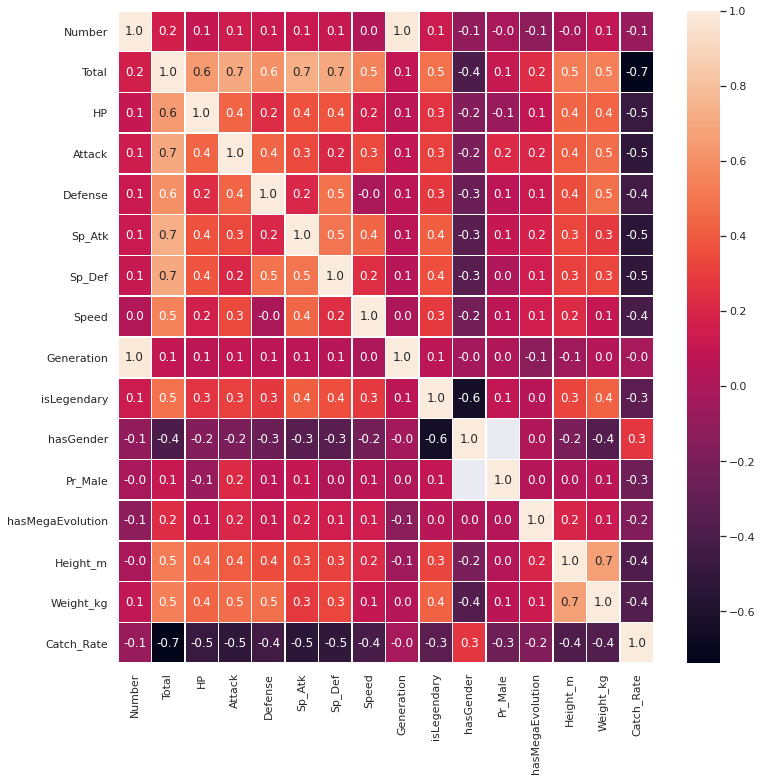

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(poke.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
# list of features to print
d_list = ['Pr_Male', 'Catch_Rate', 'Height_m', 'Weight_kg', 'Total']
dimensions = []

# add dimensions
for d in d_list:
    dimensions.append(dict(label=d, values=data[d]))

# create splom graph    
data = go.Splom(dimensions=dimensions, 
                showupperhalf=True,
                marker = dict(size=5, showscale=False,))

fig = go.Figure(data=data)
fig.update_layout(height=900, width= 900, title='Compare numerical features')
#Image(fig.to_image('jpg'))
fig.show()

# Clustering

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

poke_dm.select_dtypes(include=numerics).columns

Index(['Number', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed', 'Generation', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Type_Bug', 'Type_Dark', 'Type_Dragon', 'Type_Electric', 'Type_Fairy',
       'Type_Fighting', 'Type_Fire', 'Type_Flying', 'Type_Ghost', 'Type_Grass',
       'Type_Ground', 'Type_Ice', 'Type_Normal', 'Type_Poison', 'Type_Psychic',
       'Type_Rock', 'Type_Steel', 'Type_Water'],
      dtype='object')

In [ ]:
# let's print a dendogram of our data
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# list of features
num_feat = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Type_Bug', 'Type_Dark', 'Type_Dragon', 'Type_Electric', 'Type_Fairy',
       'Type_Fighting', 'Type_Fire', 'Type_Flying', 'Type_Ghost', 'Type_Grass',
       'Type_Ground', 'Type_Ice', 'Type_Normal', 'Type_Poison', 'Type_Psychic',
       'Type_Rock', 'Type_Steel', 'Type_Water']

# calculate the clusters with euclidean distance
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# create dendogram with custom linkagefun
fig = ff.create_dendrogram(
    poke_dm[num_feat], orientation='bottom',
    linkagefun=lambda x: shc.linkage(poke_dm[num_feat], 'ward', metric='euclidean'), 
    color_threshold=2000
)
fig.update_layout(width=800, height=500)
fig.show()
# Image(fig.to_image('jpg'))

In [ ]:
cl = cluster.fit_predict(poke_dm[num_feat])
# add cluster in dataframe
poke_dm['Cluster'] = cl

# totalizate each group
zero, um, dois, tres = [], [], [], []
for ii, i in enumerate(cl):
    if i==0:
        zero.append(poke[poke.index == ii].Name.values[0])
    if i==1:
        um.append(poke[poke.index == ii].Name.values[0])
    if i==2:
        dois.append(poke[poke.index == ii].Name.values[0])
    if i==3:
        tres.append(poke[poke.index == ii].Name.values[0])
       
print('0:{}, 1:{}, 2:{}, 3:{}'.format(len(zero), len(um), len(dois), len(tres)))
# print the smallest group 
print(zero)

0:51, 1:201, 2:285, 3:184
['Golem', 'Gyarados', 'Lapras', 'Snorlax', 'Dragonite', 'Steelix', 'Raikou', 'Entei', 'Suicune', 'Tyranitar', 'Lugia', 'Ho-Oh', 'Aggron', 'Wailord', 'Glalie', 'Metagross', 'Regirock', 'Regice', 'Registeel', 'Kyogre', 'Groudon', 'Rayquaza', 'Torterra', 'Hippowdon', 'Rhyperior', 'Mamoswine', 'Probopass', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Arceus', 'Gigalith', 'Beartic', 'Golurk', 'Hydreigon', 'Cobalion', 'Terrakion', 'Virizion', 'Reshiram', 'Zekrom', 'Kyurem', 'Tyrantrum', 'Aurorus', 'Goodra', 'Avalugg', 'Xerneas', 'Yveltal', 'Zygarde', 'Volcanion']


In [ ]:
# Check the behavior of groups with respect to field combinations
comb = [['Total','Catch_Rate'],
        ['Attack','Catch_Rate'],
        ['Defense','Catch_Rate'],
        ['Weight_kg','Height_m'],
        ['Attack','Defense'],
        ['Speed','HP']]

# create a figure
fig = make_subplots(rows=3,cols=2,
                    vertical_spacing=0.09,
                    horizontal_spacing=0.075,
                    subplot_titles= ['{} x {}'.format(i[0], i[1]) for i in comb]
                   )

# each combination with a subplot
for enu, fields in enumerate(comb):         
    value_x = poke_dm[fields[0]]
    value_y = poke_dm[fields[1]]
    
    row=int(np.ceil((enu+1)/2))
    col=(enu % 2)+1
    
    trace = go.Scatter(x=value_x,
                       y=value_y, 
                       mode='markers',
                       marker=dict(color=poke_dm['Cluster'], colorscale=["red", "green", "blue"])                       
                       )
    fig.append_trace(trace, row=row, col=col)
    
fig.update_layout(title='Comparison of some features with Clusters', showlegend=False, width=800, height=800)
fig.show()
#Image(fig.to_image('jpg'))

## Reducing dimensionality with PCA

In [ ]:
from sklearn.decomposition import PCA as skPCA

# create two components PCA
s_pca = skPCA(n_components=2)
pca_components = s_pca.fit_transform(poke_dm[num_feat])
c_pca1 = pca_components[:,0]
c_pca2 = pca_components[:,1]
# add the componets to dataframe
poke_dm['pca1'] = c_pca1
poke_dm['pca2'] = c_pca2
poke_dm.head(2)

,Number,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Color_Black,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow,Type_Bug,Type_Dark,Type_Dragon,Type_Electric,Type_Fairy,Type_Fighting,Type_Fire,Type_Flying,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water,Cluster,pca1,pca2
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,-83.239497,-33.685218
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,-6.273472,-55.893730


In [ ]:
# Plot PCA with the previously groups
poke_dm_temp = poke_dm
trace = go.Scatter(x=poke_dm_temp['pca1'],
                   y=poke_dm_temp['pca2'],
                   mode='markers',
                   text=poke_dm_temp['Name'],
                   marker=dict(color=poke_dm_temp['Cluster'], colorscale=["red", "green", "blue"]))

fig = go.Figure(data=[trace])
fig.update_layout(title='PCA and clusters of all generations',width=800, height=500)
fig.show()
#Image(fig.to_image('jpg'))

## Modelling


In [ ]:
from sklearn.model_selection import cross_val_score # Cross validation function
from sklearn.metrics import confusion_matrix # To generate n confusion matrix
from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn.tree import DecisionTreeClassifier # Decision Tree to Classifier

# features used in models
x_features = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
            'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate',
            'Type_Bug', 'Type_Dark', 'Type_Dragon', 'Type_Electric', 'Type_Fairy',
            'Type_Fighting', 'Type_Fire', 'Type_Flying', 'Type_Ghost', 'Type_Grass',
            'Type_Ground', 'Type_Ice', 'Type_Normal', 'Type_Poison', 'Type_Psychic',
            'Type_Rock', 'Type_Steel', 'Type_Water']
# feature target
y_features = ['isLegendary']

# separete dataset and targer
data_set = poke_dm[x_features]
target = poke_dm[y_features].values.ravel()

# list of models
models = [
          KNeighborsClassifier(3), 
          DecisionTreeClassifier(max_depth=5),          
         ]

# name models
models_name = ["Nearest Neighbors", "Decision Tree"]

In [ ]:
total_scores = {}
for model, model_name in zip(models, models_name):
    np.random.seed = 42
    # K-fold k=5
    scores = cross_val_score(model, data_set, target, cv=10, scoring='accuracy')
    total_scores[model_name] = [scores, scores.mean(), scores.std()]
    # Accuracy
    print("{} -- K-Fold mean accuracy: {:0.3f} (std: {:0.3f})".format(model_name, scores.mean(), scores.std()))
    # Verify prediction of all data
    y_pred = model.fit(data_set,target).predict(data_set)
    
    # Confusion Matrix
    z = confusion_matrix(target, y_pred)
    x=['No Legendary', 'Is Legendary']
    y=['No Legendary', 'Is Legendary']
    
    # Generate annotations to graph
    annotations = []
    for n, row in enumerate(z):
        for m, val in enumerate(row):
            annotations.append(go.layout.Annotation(text=str(z[n][m]), x=x[m], y=y[n],
                                             xref='x1', yref='y1', showarrow=False))
            
    data = [go.Heatmap(x=x,y=y,z=z,                   
                   colorscale=["white", "lightblue"])] #amp blues peach

    layout = go.Layout(title='Confusion Matrix - {}'.format(model_name), 
                       xaxis={'title' : 'Predicted label'},
                       yaxis={'autorange' : 'reversed', 
                              'title' : 'True Label'})
    
    fig = go.Figure(data=data, layout=layout)
    fig['layout'].update(annotations=annotations, height=350, width=350)

    fig.show()
    #display(Image(fig.to_image('jpg')))
    print('----------------------------------------------------------------------------')

Nearest Neighbors -- K-Fold mean accuracy: 0.975 (std: 0.014)


----------------------------------------------------------------------------
Decision Tree -- K-Fold mean accuracy: 0.983 (std: 0.012)


----------------------------------------------------------------------------


In [ ]:
# boxplot of 10 folds of each model
# Gaussian Process has better result and RBF SVM has a more stable model
fig = go.Figure()
for enu, (model, (scores, v_mean, v_std)) in enumerate(total_scores.items()):
    fig.add_trace(go.Box(
        y=scores, 
        name=model,  
        boxmean='sd'))
fig.update_layout(title = 'Cross Validation Accuracy Comparacion')
fig.update_yaxes(title = 'Accuracy')
fig.update_xaxes(title = 'Models')
fig.show()
#display(Image(fig.to_image('jpg')))